checkmate: Black wins!


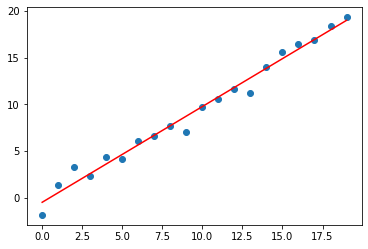

Train on 14 samples, validate on 3 samples
Epoch 1/100
14/14 [==============================] - 1s 65ms/step - loss: 0.2699 - accuracy: 0.0000e+00 - val_loss: -2.1819 - val_accuracy: 0.0000e+00
Epoch 2/100
14/14 [==============================] - 0s 426us/step - loss: -0.7964 - accuracy: 0.0000e+00 - val_loss: -4.1119 - val_accuracy: 0.0000e+00
Epoch 3/100
14/14 [==============================] - 0s 473us/step - loss: -1.8469 - accuracy: 0.0000e+00 - val_loss: -6.1145 - val_accuracy: 0.0000e+00
Epoch 4/100
14/14 [==============================] - 0s 383us/step - loss: -2.9280 - accuracy: 0.0000e+00 - val_loss: -8.2601 - val_accuracy: 0.0000e+00
Epoch 5/100
14/14 [==============================] - 0s 372us/step - loss: -4.0771 - accuracy: 0.0000e+00 - val_loss: -10.6006 - val_accuracy: 0.0000e+00
Epoch 6/100
14/14 [==============================] - 0s 371us/step - loss: -5.3263 - accuracy: 0.0000e+00 - val_loss: -13.2288 - val_accuracy: 0.0000e+00
Epoch 7/100
14/14 [====================

14/14 [==============================] - 0s 495us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 55/100
14/14 [==============================] - 0s 949us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 56/100
14/14 [==============================] - 0s 429us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 57/100
14/14 [==============================] - 0s 509us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 58/100
14/14 [==============================] - 0s 392us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 59/100
14/14 [==============================] - 0s 442us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 60/100
14/14 [==============================] - 0s 425us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.

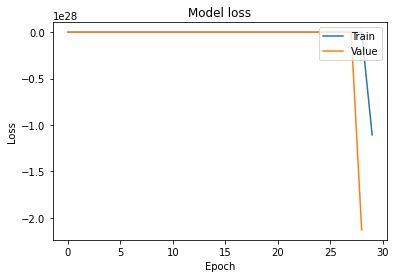

0.9809692059188906

In [90]:
import random
import chess
import chess.svg
import time
from IPython.display import display, HTML, clear_output
import numpy as np
from matplotlib.pylab import subplots
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import chess.engine
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers







board = chess.Board()

engine = chess.engine.SimpleEngine.popen_uci("./stockfish-11-mac/Mac/stockfish-11-64")
limit = chess.engine.Limit(time=2.0)
engine.play(board, limit)

#TODO: Adding CNN/RNN to store the tree array coming from analyze()


def random_player(board):
    move = random.choice(list(board.legal_moves))
    return move.uci()

random_player(board)



    
#A minmax evaluation function:

def analyze(board, move, my_color):
    score = random.random()
    # Check some things about this move:
    score += 10 if board.is_capture(move) else 0
    # To actually make the move:
    board.push(move)
    # Now check some other things:
    for (piece, value) in [(chess.PAWN, 10), 
                           (chess.BISHOP, 30), 
                           (chess.KING, 1000000), 
                           (chess.QUEEN, 90), 
                           (chess.KNIGHT, 30),
                           (chess.ROOK, 50)]:
        score += len(board.pieces(piece, my_color)) * value #how many pieces i have times its value
        score -= len(board.pieces(piece, not my_color)) * value #how many pieces the opponent has times its value
        # can also check things about the pieces position here
    # Check global things about the board
    score += 100 if board.is_checkmate() else 0
    return score

def player1(board):
    moves = list(board.legal_moves)
    for move in moves:
        newboard = board.copy()
        move.score = analyze(newboard, move, board.turn) # go through board and return a score
    moves.sort(key=lambda move: move.score, reverse=True) # sort on score
    
    return moves[0].uci()



def analyze2(board, move, my_color):
    score = random.random()
    # Check some things about this move:
    score += 10 if board.is_capture(move) else 0
    # To actually make the move:
    board.push(move)
    # Now check some other things:
    for (piece, value) in [(chess.PAWN, 10), 
                           (chess.BISHOP, 30), 
                           (chess.KING, 90), 
                           (chess.QUEEN, 90), 
                           (chess.KNIGHT, 30),
                           (chess.ROOK, 50)]:
        score += len(board.pieces(piece, my_color)) * value #how many pieces i have times its value
        score -= len(board.pieces(piece, not my_color)) * value #how many pieces the opponent has times its value
        # can also check things about the pieces position here
    # Check global things about the board
    score += 100 if board.is_checkmate() else 0
    return score

# A function allowing an intelligent player:


def player2(board):
    moves = list(board.legal_moves)
    for move in moves:
        newboard = board.copy()
        move.score = analyze2(newboard, move, board.turn) # go through board and return a score
    moves.sort(key=lambda move: move.score, reverse=True) # sort on score
    
    return moves[0].uci()




def neural_network():
    moves = list(board.legal_moves)
    for move in moves:
        newboard = board.copy()
        move.score = analyze(newboard, move, board.turn) # go through board and return a score
    moves.sort(key=lambda move: move.score, reverse=True) # sort on score
    X = np.arange(len(moves))
    Y = X+np.random.randn(len(list(board.legal_moves)))
    lr = LinearRegression()
    X,Y = X.reshape((-1,1)), Y.reshape((-1,1))
    R = lr.fit(X,Y)
    S = lr.score(X,Y) #R^2 value between 0 and 1 indicating good fit
    Y_pred = R.predict(X)
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plot = plt.show()
    
    min_max_scaler = preprocessing.MinMaxScaler()
    X_scale = min_max_scaler.fit_transform(X)
    X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
    X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

    model = Sequential([
    Dense(32, activation='relu', input_shape=(1,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])
    model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    hist_2 = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))
    model.evaluate(X_test, Y_test)[1]
    
    plt.plot(hist_2.history['loss'])
    plt.plot(hist_2.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Value'], loc='upper right')
    plt.show()
    
    return S

#A function allowing a human to play the game:

def human_player(board):
    display(board)
    uci = get_move("%s's move [q to quit]> " % who(board.turn))
    legal_uci_moves = [move.uci() for move in board.legal_moves]
    while uci not in legal_uci_moves:
        print("Legal moves: " + (",".join(sorted(legal_uci_moves))))
        uci = get_move("%s's move[q to quit]> " % who(board.turn))
    return uci




#A useful function for displaying the color of a player:

def who(player):
    return "White" if player == chess.WHITE else "Black"



#A function for displaying the board as text, or as the nice image (called SVG):

def display_board(board, use_svg):
    if use_svg:
        return board._repr_svg_()
    else:
        return "<pre>" + str(board) + "</pre>"
    
    

#The function takes to player functions (first white, then black), and an optional argument to indicate representation style:    
    
def play_game(player1, player2, visual="svg", pause=0.1):
    """
    playerN1, player2: functions that takes board, return uci move
    visual: "simple" | "svg" | None
    """
    use_svg = (visual == "svg")
    board = chess.Board()
    try:
        while not board.is_game_over(claim_draw=True):
            if board.turn == chess.WHITE:
                uci = player1(board)
            else:
                uci = player2(board)
            name = who(board.turn)
            board.push_uci(uci)
            board_stop = display_board(board, use_svg)
            html = "<b>Move %s %s, Play '%s':</b><br/>%s" % (
                       len(board.move_stack), name, uci, board_stop)
            if visual is not None:
                if visual == "svg":
                    clear_output(wait=True)
                display(HTML(html))
                if visual == "svg":
                    time.sleep(pause)
    except KeyboardInterrupt:
        msg = "Game interrupted!"
        return (None, msg, board)
    result = None
    if board.is_checkmate():
        msg = "checkmate: " + who(not board.turn) + " wins!"
        result = not board.turn
    elif board.is_stalemate():
        msg = "draw: stalemate"
    elif board.is_fivefold_repetition():
        msg = "draw: 5-fold repetition"
    elif board.is_insufficient_material():
        msg = "draw: insufficient material"
    elif board.can_claim_draw():
        msg = "draw: claim"
    if visual is not None:
        print(msg)
    return (result, msg, board)


def get_move(prompt):
    uci = input(prompt)
    if uci and uci[0] == "q":
        raise KeyboardInterrupt()
    try:
        chess.Move.from_uci(uci)
    except:
        uci = None
    return uci





#first one is white, the second one is black
play_game(player2, player1)
neural_network()



Loaded bkn5nn4.png (586px x 583px)


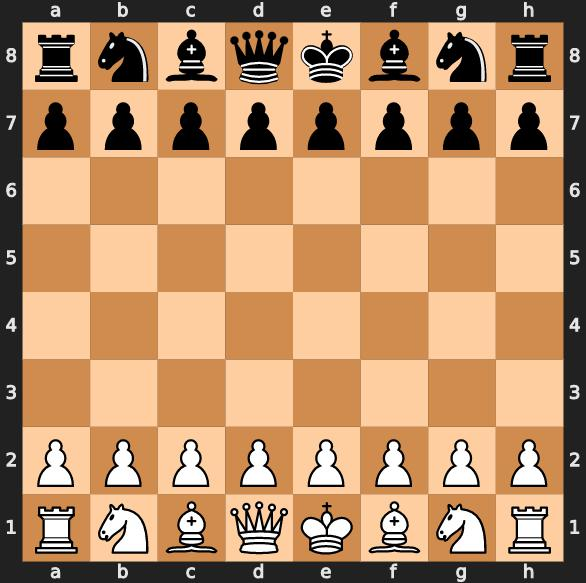

In [10]:
import tensorflow as tf
import numpy as np
np.set_printoptions(suppress=True)

sess = tf.compat.v1.InteractiveSession()

# Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display
import scipy.ndimage as nd
import scipy.signal
import chess.svg



def display_array(a, fmt='jpeg', rng=[0,1]):
  """Display an array as a picture."""
  a = (a - rng[0])/float(rng[1] - rng[0])*255
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  display(Image(data=f.getvalue()))

    



img_file = 'bkn5nn4.png'

folder = "."

img = PIL.Image.open("%s/%s" % (folder,img_file))

print (("Loaded %s (%dpx x %dpx)") % \
    (img_file, img.size[0], img.size[1]))

# Resize if image larger than 2k pixels on a side
if img.size[0] > 2000 or img.size[1] > 2000:
    print ("Image too big (%d x %d)" % (img.size[0], img.size[1]))
    new_size = 500.0 # px
    if img.size[0] > img.size[1]:
        # resize by width to new limit
        ratio = new_size / img.size[0]
    else:
        # resize by height
        ratio = new_size / img.size[1]
    print ("Reducing by factor of %.2g" % (1./ratio))
    img = img.resize(img.size * ratio, PIL.Image.ADAPTIVE)
    print ("New size: (%d x %d)" % (img.size[0], img.size[1]))

# See original image
display_array(np.asarray(img), rng=[0,255])

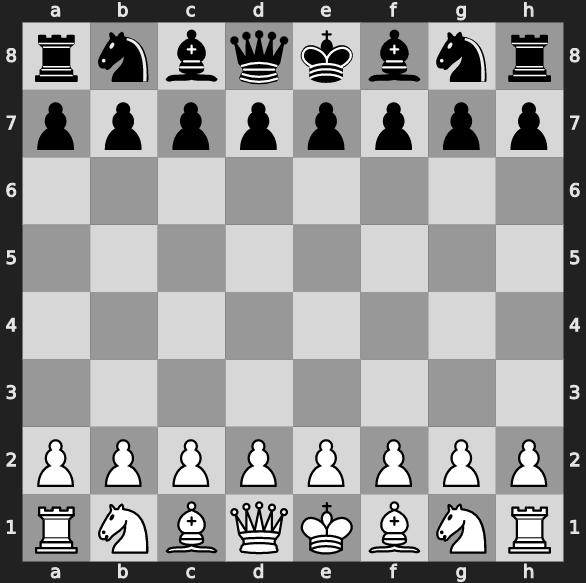

In [93]:
# Convert to grayscale and array
a = np.asarray(img.convert("L"), dtype=np.float32)

# Display array
display_array(a, rng=[0,255])

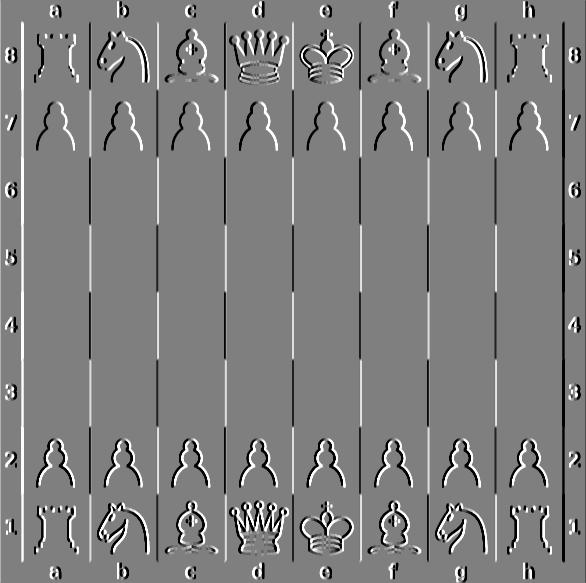

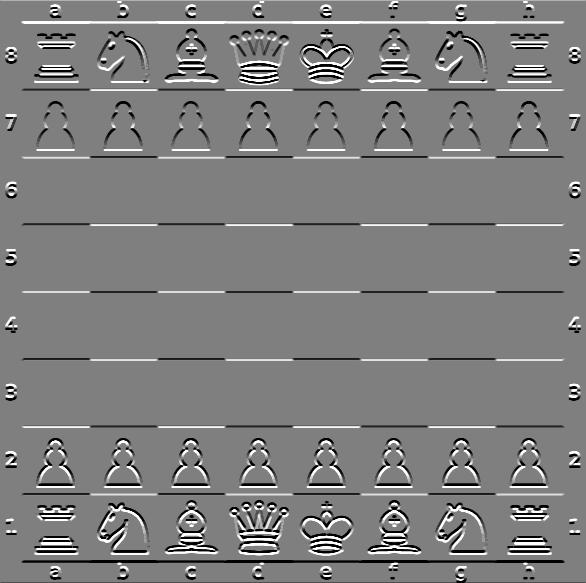

In [95]:
def make_kernel(a):
  """Transform a 2D array into a convolution kernel"""
  a = np.asarray(a)
  a = a.reshape(list(a.shape) + [1,1])
  return tf.constant(a, dtype=1)

def simple_conv(x, k):
  """A simplified 2D convolution operation"""
  x = tf.expand_dims(tf.expand_dims(x, 0), -1)
  y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding='SAME')
  return y[0, :, :, 0]

def gradientx(x):
  """Compute the x gradient of an array"""
  gradient_x = make_kernel([[-1.,0., 1.],
                            [-1.,0., 1.],
                            [-1.,0., 1.]])
  return simple_conv(x, gradient_x)

def gradienty(x):
  """Compute the x gradient of an array"""
  gradient_y = make_kernel([[-1., -1, -1],[0.,0,0], [1., 1, 1]])
  return simple_conv(x, gradient_y)

def corners(x):
  """Find chess square corners in an array"""
  chess_corner = make_kernel([[-1., 0, 1],[0., 0., 0.], [1.,0, -1]])
  return simple_conv(x, chess_corner)

# Following are meant for binary images
def dilate(x, size=3):
  """Dilate"""
  kernel = make_kernel(np.ones([size,size], dtype=np.float32))
  return tf.clip_by_value(simple_conv(x, kernel),
                          np.float32(1),
                          np.float32(2))-np.float32(1)

def erode(x, size=3):
  """Erode"""
  kernel = make_kernel(np.ones([size,size]))
  return tf.clip_by_value(simple_conv(x, kernel),
                          np.float32(size*size-1),
                          np.float32(size*size))-np.float32(size*size-1)

def opening(x, size=3):
    return dilate(erode(x,size),size)

def closing(x, size=3):
    return erode(dilate(x,size),size)

def skeleton(x, size=3):
    """Skeletonize"""
    return tf.clip_by_value(erode(x) - opening(erode(x)),
                            0.,
                            1.)


# Get our grayscale image matrix
A = tf.Variable(a)

# Get X & Y gradients and subtract opposite gradient
# Strongest response where gradient is unidirectional
# clamp into range 0-1
# Dx = tf.clip_by_value(np.abs(gradientx(A)) - np.abs(gradienty(A)),
#                       0., 1.)
# Dy = tf.clip_by_value(np.abs(gradienty(A)) - np.abs(gradientx(A)),
#                       0., 1.)

Dx = gradientx(A)
Dy = gradienty(A)

# Dxy = np.abs(gradientx(A) * gradienty(A))
# Dc = np.abs(corners(A))


# Initialize state to initial conditions
tf.compat.v1.global_variables_initializer()

display_array(Dx.numpy(), rng=[-255,255])
display_array(Dy.numpy(), rng=[-255,255])

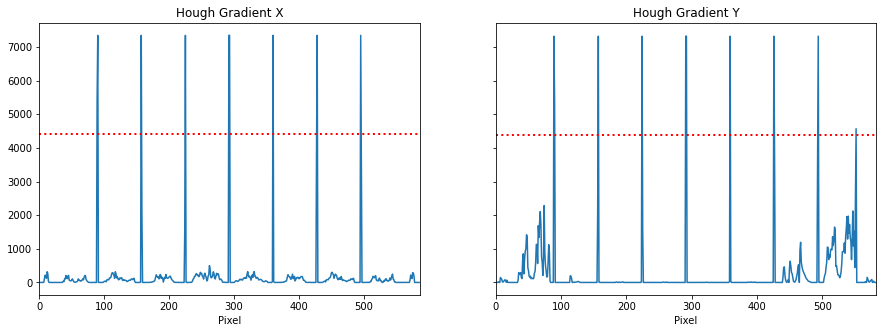

In [96]:
Dx_pos = tf.clip_by_value(Dx, 0., 255., name="dx_positive")
Dx_neg = tf.clip_by_value(Dx, -255., 0., name='dx_negative')
Dy_pos = tf.clip_by_value(Dy, 0., 255., name="dy_positive")
Dy_neg = tf.clip_by_value(Dy, -255., 0., name='dy_negative')

hough_Dx = tf.reduce_sum(Dx_pos, 0) * tf.reduce_sum(-Dx_neg, 0) / (a.shape[0]*a.shape[0])
hough_Dy = tf.reduce_sum(Dy_pos, 1) * tf.reduce_sum(-Dy_neg, 1) / (a.shape[1]*a.shape[1])
# Normalized to 0-255*255=65025 range

%matplotlib inline
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2,sharey=True, figsize=(15,5))

# Arbitrarily choose half of max value as threshold, since they're such strong responses
hough_Dx_thresh = tf.reduce_max(hough_Dx) * 3 / 5
hough_Dy_thresh = tf.reduce_max(hough_Dy) * 3 /5

ax1.plot(hough_Dx.numpy());
ax1.axhline(hough_Dx_thresh.numpy(), lw=2,linestyle=':',color='r')
ax1.set_title('Hough Gradient X')
ax1.set_xlabel('Pixel')
ax1.set_xlim(0,a.shape[1])

ax2.plot(hough_Dy.numpy())
ax2.axhline(hough_Dy_thresh.numpy(), lw=2,linestyle=':',color='r')
ax2.set_title('Hough Gradient Y')
ax2.set_xlim(0,a.shape[0])
ax2.set_xlabel('Pixel');

In [97]:
def checkMatch(lineset):
    """Checks whether there exists 7 lines of consistent increasing order in set of lines"""
    linediff = np.diff(lineset)
    x = 0
    cnt = 0
    for line in linediff:
        # Within 5 px of the other (allowing for minor image errors)
        if np.abs(line - x) < 5:
            cnt += 1
        else:
            cnt = 0
            x = line
    return cnt == 5

def pruneLines(lineset):
    """Prunes a set of lines to 7 in consistent increasing order (chessboard)"""
    linediff = np.diff(lineset)
    x = 0
    cnt = 0
    start_pos = 0
    for i, line in enumerate(linediff):
        # Within 5 px of the other (allowing for minor image errors)
        if np.abs(line - x) < 5:
            cnt += 1
            if cnt == 5:
                end_pos = i+2
                return lineset[start_pos:end_pos]
        else:
            cnt = 0
            x = line
            print (i, x)
            start_pos = i
    return lineset

def skeletonize_1d(arr):
    """return skeletonized 1d array (thin to single value, favor to the right)"""
    _arr = arr.copy() # create a copy of array to modify without destroying original
    # Go forwards
    for i in range(_arr.size-1):
        # Will right-shift if they are the same
        if arr[i] <= _arr[i+1]:
            _arr[i] = 0
    
    # Go reverse
    for i in np.arange(_arr.size-1, 0,-1):
        if _arr[i-1] > _arr[i]:
            _arr[i] = 0
    return _arr

def getChessLines(hdx, hdy, hdx_thresh, hdy_thresh):
    """Returns pixel indices for the 7 internal chess lines in x and y axes"""
    # Blur
    gausswin = scipy.signal.gaussian(21,4)
    gausswin /= np.sum(gausswin)

    # Blur where there is a strong horizontal or vertical line (binarize)
    blur_x = np.convolve(hdx > hdx_thresh, gausswin, mode='same')
    blur_y = np.convolve(hdy > hdy_thresh, gausswin, mode='same')


    skel_x = skeletonize_1d(blur_x)
    skel_y = skeletonize_1d(blur_y)

    # Find points on skeletonized arrays (where returns 1-length tuple)
    lines_x = np.where(skel_x)[0] # vertical lines
    lines_y = np.where(skel_y)[0] # horizontal lines
    
    # Prune inconsistent lines
    lines_x = pruneLines(lines_x)
    lines_y = pruneLines(lines_y)
    
    is_match = len(lines_x) == 7 and len(lines_y) == 7 and checkMatch(lines_x) and checkMatch(lines_y)
    
    return lines_x, lines_y, is_match

# Get chess lines
lines_x, lines_y, is_match = getChessLines(hough_Dx.numpy().flatten(), \
                                           hough_Dy.numpy().flatten(), \
                                           hough_Dx_thresh.numpy(), \
                                           hough_Dy_thresh.numpy())

lines_x, lines_y, is_match = getChessLines(hough_Dx.numpy().flatten(), \
                                           hough_Dy.numpy().flatten(), \
                                           hough_Dx_thresh.numpy()*.9, \
                                           hough_Dy_thresh.numpy()*.9)

print ("X",lines_x, np.diff(lines_x))
print ("Y",lines_y, np.diff(lines_y))
if is_match:
    print ("Chessboard found")
else:
    print ("Couldn't find Chessboard")

0 67
0 67
0 67
0 67
X [ 90 157 225 293 360 428 495] [67 68 68 67 68 67]
Y [ 90 157 224 292 359 427 494] [67 67 68 67 68 67]
Chessboard found


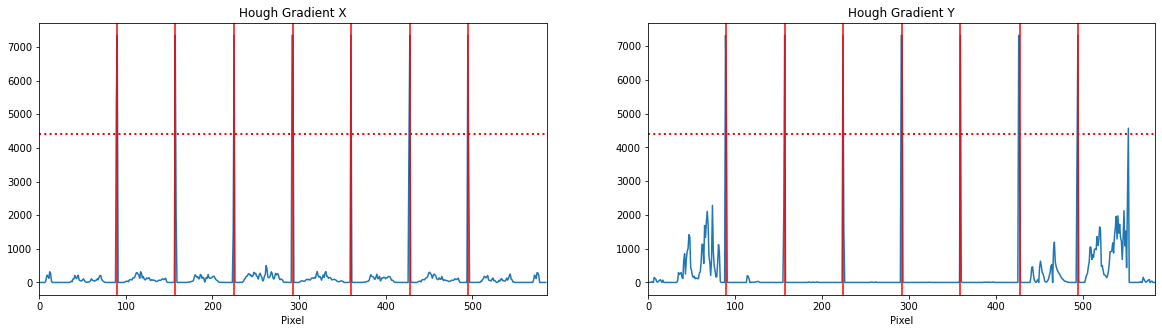

In [98]:
# Plot blurred 1d hough arrays and skeletonized versions
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,5))

ax1.plot(hough_Dx.numpy());
ax1.axhline(hough_Dx_thresh.numpy(), lw=2,linestyle=':',color='r')
ax1.set_title('Hough Gradient X')
ax1.set_xlabel('Pixel')
ax1.set_xlim(0,a.shape[1])

ax2.plot(hough_Dy.numpy())
ax2.axhline(hough_Dy_thresh.numpy(), lw=2,linestyle=':',color='r')
ax2.set_title('Hough Gradient Y')
ax2.set_xlim(0,a.shape[0])
ax2.set_xlabel('Pixel');

# Plot lines for where peaks where found
if len(lines_x < 20):
    for hx in lines_x:
        ax1.axvline(hx,color='r')
if len(lines_y < 20):
    for hy in lines_y:
        ax2.axvline(hy,color='r')

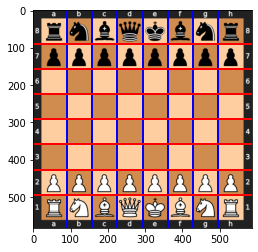

In [99]:
plt.imshow(img)
for hx in lines_x:
    plt.axvline(hx, color='b', lw=2)

for hy in lines_y:
    plt.axhline(hy, color='r', lw=2)

In [100]:
print ("X   (vertical)",lines_x, np.diff(lines_x))
print ("Y (horizontal)",lines_y, np.diff(lines_y))

def getChessTiles(a, lines_x, lines_y):
    """Split up input grayscale array into 64 tiles stacked in a 3D matrix using the chess linesets"""
    # Find average square size, round to a whole pixel for determining edge pieces sizes
    stepx = np.int32(np.round(np.mean(np.diff(lines_x))))
    stepy = np.int32(np.round(np.mean(np.diff(lines_y))))
    
    # Pad edges as needed to fill out chessboard (for images that are partially over-cropped)
#     print stepx, stepy
#     print "x",lines_x[0] - stepx, "->", lines_x[-1] + stepx, a.shape[1]
#     print "y", lines_y[0] - stepy, "->", lines_y[-1] + stepy, a.shape[0]
    padr_x = 0
    padl_x = 0
    padr_y = 0
    padl_y = 0
    
    if lines_x[0] - stepx < 0:
        padl_x = np.abs(lines_x[0] - stepx)
    if lines_x[-1] + stepx > a.shape[1]-1:
        padr_x = np.abs(lines_x[-1] + stepx - a.shape[1])
    if lines_y[0] - stepy < 0:
        padl_y = np.abs(lines_y[0] - stepy)
    if lines_y[-1] + stepx > a.shape[0]-1:
        padr_y = np.abs(lines_y[-1] + stepy - a.shape[0])
    
    # New padded array
#     print "Padded image to", ((padl_y,padr_y),(padl_x,padr_x))
    a2 = np.pad(a, ((padl_y,padr_y),(padl_x,padr_x)), mode='edge')
    
    setsx = np.hstack([lines_x[0]-stepx, lines_x, lines_x[-1]+stepx]) + padl_x
    setsy = np.hstack([lines_y[0]-stepy, lines_y, lines_y[-1]+stepy]) + padl_y
    
    a2 = a2[setsy[0]:setsy[-1], setsx[0]:setsx[-1]]
    setsx -= setsx[0]
    setsy -= setsy[0]
#     display_array(a2, rng=[0,255])    
#     print "X:",setsx
#     print "Y:",setsy
    
    # Matrix to hold images of individual squares (in grayscale)
#     print "Square size: [%g, %g]" % (stepy, stepx)
    squares = np.zeros([np.round(stepy), np.round(stepx), 64],dtype=np.uint8)
    
    # For each row
    for i in range(0,8):
        # For each column
        for j in range(0,8):
            # Vertical lines
            x1 = setsx[i]
            x2 = setsx[i+1]
            padr_x = 0
            padl_x = 0
            padr_y = 0
            padl_y = 0

            if (x2-x1) > stepx:
                if i == 7:
                    x1 = x2 - stepx
                else:
                    x2 = x1 + stepx
            elif (x2-x1) < stepx:
                if i == 7:
                    # right side, pad right
                    padr_x = stepx-(x2-x1)
                else:
                    # left side, pad left
                    padl_x = stepx-(x2-x1)
            # Horizontal lines
            y1 = setsy[j]
            y2 = setsy[j+1]

            if (y2-y1) > stepy:
                if j == 7:
                    y1 = y2 - stepy
                else:
                    y2 = y1 + stepy
            elif (y2-y1) < stepy:
                if j == 7:
                    # right side, pad right
                    padr_y = stepy-(y2-y1)
                else:
                    # left side, pad left
                    padl_y = stepy-(y2-y1)
            # slicing a, rows sliced with horizontal lines, cols by vertical lines so reversed
            # Also, change order so its A1,B1...H8 for a white-aligned board
            # Apply padding as defined previously to fit minor pixel offsets
            squares[:,:,(7-j)*8+i] = np.pad(a2[y1:y2, x1:x2],((padl_y,padr_y),(padl_x,padr_x)), mode='edge')
    return squares

if is_match:
    # Possibly check np.std(np.diff(lines_x)) for variance etc. as well/instead
    print ("7 horizontal and vertical lines found, slicing up squares")
    squares = getChessTiles(a, lines_x, lines_y)
    print ("Tiles generated: (%dx%d)*%d" % (squares.shape[0], squares.shape[1], squares.shape[2]))
else:
    print ("Number of lines not equal to 7")

X   (vertical) [ 90 157 225 293 360 428 495] [67 68 68 67 68 67]
Y (horizontal) [ 90 157 224 292 359 427 494] [67 67 68 67 68 67]
7 horizontal and vertical lines found, slicing up squares
Tiles generated: (67x68)*64


Order is row-wise from top left of image going right and down, so a8,b8....a7,b7,c7...h1
Showing all squares...
#24: A4


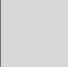

#16: A3


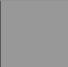

#15: H2


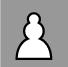

#55: H7


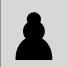

#54: G7


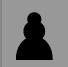

#29: F4


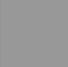

#27: D4


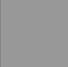

#4: E1


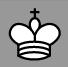

#41: B6


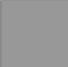

#19: D3


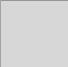

#56: A8


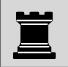

#34: C5


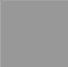

#39: H5


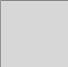

#18: C3


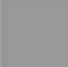

#57: B8


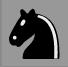

#11: D2


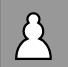

#6: G1


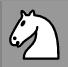

#2: C1


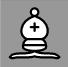

#45: F6


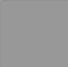

#23: H3


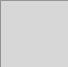

#52: E7


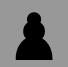

#13: F2


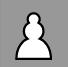

#28: E4


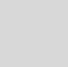

#7: H1


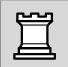

#26: C4


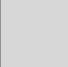

#43: D6


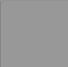

#49: B7


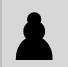

#51: D7


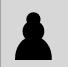

#36: E5


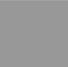

#61: F8


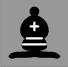

#42: C6


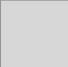

#10: C2


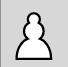

#44: E6


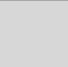

#33: B5


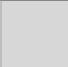

#58: C8


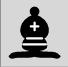

#14: G2


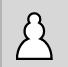

#38: G5


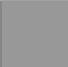

#48: A7


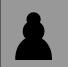

#1: B1


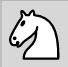

#5: F1


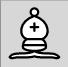

#9: B2


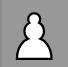

#62: G8


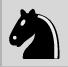

#30: G4


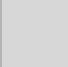

#60: E8


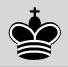

#12: E2


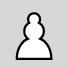

#0: A1


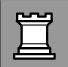

#50: C7


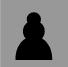

#22: G3


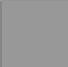

#21: F3


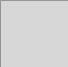

#59: D8


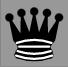

#31: H4


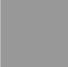

#53: F7


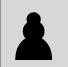

#20: E3


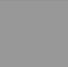

#35: D5


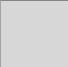

#17: B3


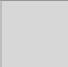

#32: A5


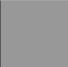

#63: H8


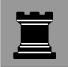

#40: A6


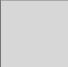

#46: G6


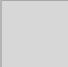

#3: D1


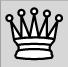

#37: F5


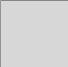

#47: H6


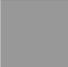

#25: B4


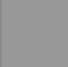

#8: A2


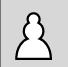

In [105]:
letters = 'ABCDEFGH'

if is_match:
    print ("Order is row-wise from top left of image going right and down, so a8,b8....a7,b7,c7...h1")
    print ("Showing all squares...")
    for i in np.random.choice(np.arange(64),64,replace=False):
        print ("#%d: %s%d" % (i, letters[i%8], i/8+1))
        display_array(squares[:,:,i],rng=[0,255])
else:
    print ("Didn't have lines to slice image up.")

In [103]:
import os
img_save_dir = "chessboards/output_tiles/squares_%s" % img_file[:-4]

if not is_match:
    print ("No squares to save")
else:
    if not os.path.exists(img_save_dir):
        os.makedirs(img_save_dir)
        print ("Created dir %s" % img_save_dir)
    
    for i in range(64):
        sqr_filename = "%s/%s_%s%d.png" % (img_save_dir, img_file[:-4], letters[i%8], i/8+1)
        if i % 8 == 0:
            print ("#%d: saving %s..." % (i, sqr_filename))
        
        # Make resized 32x32 image from matrix and save
        PIL.Image.fromarray(squares[:,:,i]) \
            .resize([32,32], PIL.Image.ADAPTIVE) \
            .save(sqr_filename)

Created dir chessboards/output_tiles/squares_bkn5nn4
#0: saving chessboards/output_tiles/squares_bkn5nn4/bkn5nn4_A1.png...
#8: saving chessboards/output_tiles/squares_bkn5nn4/bkn5nn4_A2.png...
#16: saving chessboards/output_tiles/squares_bkn5nn4/bkn5nn4_A3.png...
#24: saving chessboards/output_tiles/squares_bkn5nn4/bkn5nn4_A4.png...
#32: saving chessboards/output_tiles/squares_bkn5nn4/bkn5nn4_A5.png...
#40: saving chessboards/output_tiles/squares_bkn5nn4/bkn5nn4_A6.png...
#48: saving chessboards/output_tiles/squares_bkn5nn4/bkn5nn4_A7.png...
#56: saving chessboards/output_tiles/squares_bkn5nn4/bkn5nn4_A8.png...
